# WeatherPy
----

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

import requests
import json
import os

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "./output_data/cities.csv"
output_data_file = "citiesA.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List
This is achieved using citipy to find the name of the nearest city based on latitude and longitude.  First a set of randm latitude and longitude values are generated.  Looping through those values identifies the nearest city using citipy and if the city is not already in the list of cities it is added. The result is a list of random city names. 

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)  #cities is a list of city names

# Print the city count to confirm sufficient count
len(cities)


609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
# set up dataframe column names
column_names = ['City','Cloudiness','Country',
                'Date','Humidity','Lat','Lng',
                'Max Temp','Wind Speed']

# Create an empty list to populate with weather data
weather = []

# Print a banner
print('Beginning Data Retrieval')
print("------------------------------")

# Loop over the list of cities and request data from openweather
for i in range(0, len(cities)):
    # Set up the url for the city to query
    url="http://api.openweathermap.org/data/2.5/weather?q="+cities[i]+"&units=imperial&appid=283a9319d8bc008a581bb0b88d702293"
    #print(url)
    
    try: 
        # Make the request call and jsonify it all in one step
        response = requests.get(url).json()
        # Print a progress report to the screen
        print("Processing Record \033[36m {0}\033[0m of Set \033[36m {1} \033[0m | {2}".format(i, i, cities[i]))
        # append the call data to the weather list
        weather.append([response['name'], response['clouds']['all'], 
                    response['sys']['country'], 
                    response['dt'], response['main']['humidity'], response['coord']['lat'], 
                    response['coord']['lon'], response['main']['temp_max'], 
                    response['wind']['speed']])
    except:
        # If the city is not found just skip it and process the next city 
        print('City \033[1m not \033[0m found. Skipping...')

# Create a dataframe with the weather data
df = pd.DataFrame(weather, columns=column_names)
df


Beginning Data Retrieval
------------------------------
Processing Record  0 of Set  0  | victoria
Processing Record  1 of Set  1  | nikolskoye
Processing Record  2 of Set  2  | zlatoustovsk
City  not  found. Skipping...
Processing Record  3 of Set  3  | bluff
Processing Record  4 of Set  4  | payo
Processing Record  5 of Set  5  | saint-philippe
Processing Record  6 of Set  6  | lavrentiya
Processing Record  7 of Set  7  | inirida
Processing Record  8 of Set  8  | chenzhou
Processing Record  9 of Set  9  | kavieng
Processing Record  10 of Set  10  | megion
Processing Record  11 of Set  11  | lagoa
Processing Record  12 of Set  12  | nemuro
Processing Record  13 of Set  13  | dombarovskiy
Processing Record  14 of Set  14  | bandarbeyla
Processing Record  15 of Set  15  | georgetown
Processing Record  16 of Set  16  | mataura
Processing Record  17 of Set  17  | albany
Processing Record  18 of Set  18  | taolanaro
City  not  found. Skipping...
Processing Record  19 of Set  19  | kruisfon

Processing Record  120 of Set  120  | nanortalik
Processing Record  121 of Set  121  | nishihara
Processing Record  122 of Set  122  | aykhal
Processing Record  123 of Set  123  | aksum
Processing Record  124 of Set  124  | buala
Processing Record  125 of Set  125  | adolfo lopez mateos
Processing Record  126 of Set  126  | bundaberg
Processing Record  127 of Set  127  | lolodorf
Processing Record  128 of Set  128  | saleaula
City  not  found. Skipping...
Processing Record  129 of Set  129  | gazanjyk
Processing Record  130 of Set  130  | thompson
Processing Record  131 of Set  131  | asau
Processing Record  132 of Set  132  | kodiak
Processing Record  133 of Set  133  | hobart
Processing Record  134 of Set  134  | lebu
Processing Record  135 of Set  135  | belushya guba
City  not  found. Skipping...
Processing Record  136 of Set  136  | hithadhoo
Processing Record  137 of Set  137  | bridgetown
Processing Record  138 of Set  138  | hudiksvall
Processing Record  139 of Set  139  | asfi

Processing Record  244 of Set  244  | madimba
Processing Record  245 of Set  245  | bud
Processing Record  246 of Set  246  | gharghoda
Processing Record  247 of Set  247  | micco
Processing Record  248 of Set  248  | norman wells
Processing Record  249 of Set  249  | bambous virieux
Processing Record  250 of Set  250  | talakan
Processing Record  251 of Set  251  | boa vista
Processing Record  252 of Set  252  | dikson
Processing Record  253 of Set  253  | tirur
Processing Record  254 of Set  254  | saskylakh
Processing Record  255 of Set  255  | xiongyue
Processing Record  256 of Set  256  | chuy
Processing Record  257 of Set  257  | yerbogachen
Processing Record  258 of Set  258  | riyadh
Processing Record  259 of Set  259  | shubarshi
Processing Record  260 of Set  260  | beringovskiy
Processing Record  261 of Set  261  | kerikeri
Processing Record  262 of Set  262  | kirakira
Processing Record  263 of Set  263  | nalut
Processing Record  264 of Set  264  | fairbanks
Processing Rec

Processing Record  366 of Set  366  | casino
Processing Record  367 of Set  367  | korhogo
Processing Record  368 of Set  368  | lasa
Processing Record  369 of Set  369  | chitrakonda
Processing Record  370 of Set  370  | waipawa
Processing Record  371 of Set  371  | padang
Processing Record  372 of Set  372  | makakilo city
Processing Record  373 of Set  373  | naze
Processing Record  374 of Set  374  | phan thiet
Processing Record  375 of Set  375  | port macquarie
Processing Record  376 of Set  376  | karakendzha
City  not  found. Skipping...
Processing Record  377 of Set  377  | dulag
Processing Record  378 of Set  378  | nantucket
Processing Record  379 of Set  379  | henties bay
Processing Record  380 of Set  380  | sakaiminato
Processing Record  381 of Set  381  | crab hill
City  not  found. Skipping...
Processing Record  382 of Set  382  | kununurra
Processing Record  383 of Set  383  | dwarka
Processing Record  384 of Set  384  | gazojak
Processing Record  385 of Set  385  | c

Processing Record  485 of Set  485  | uvinza
Processing Record  486 of Set  486  | quepos
Processing Record  487 of Set  487  | jalu
Processing Record  488 of Set  488  | pasighat
Processing Record  489 of Set  489  | vilyuysk
Processing Record  490 of Set  490  | cap malheureux
Processing Record  491 of Set  491  | poplar bluff
Processing Record  492 of Set  492  | svetlogorsk
Processing Record  493 of Set  493  | hobyo
Processing Record  494 of Set  494  | les cayes
Processing Record  495 of Set  495  | laiyang
Processing Record  496 of Set  496  | nuuk
Processing Record  497 of Set  497  | shimoda
Processing Record  498 of Set  498  | skjervoy
Processing Record  499 of Set  499  | warmbad
Processing Record  500 of Set  500  | kanganpur
Processing Record  501 of Set  501  | antofagasta
Processing Record  502 of Set  502  | nienburg
Processing Record  503 of Set  503  | nome
Processing Record  504 of Set  504  | azuaga
Processing Record  505 of Set  505  | namibe
Processing Record  50

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hong Kong,40,HK,1584110208,78,22.29,114.16,77.00,5.82
1,Nikolskoye,90,RU,1584110885,74,59.70,30.79,37.40,17.90
2,Bluff,11,NZ,1584110859,96,-46.60,168.33,45.23,3.60
3,Payo,100,ID,1584110887,94,-3.75,103.64,68.99,3.71
4,Saint-Philippe,100,RE,1584110889,74,-21.36,55.77,81.00,21.92
...,...,...,...,...,...,...,...,...,...
557,Faya,71,SA,1584111150,40,18.39,42.45,73.40,16.11
558,Castelo Branco,100,PT,1584110926,62,39.82,-7.49,71.01,6.53
559,Tondano,20,ID,1584111150,94,1.30,124.91,75.20,1.12
560,Matamoros,40,MX,1584111151,39,25.53,-103.25,73.99,2.82


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Save the city data into a CSV file
df.to_csv (output_data_file, header=True)

# display the dataframe
df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Hong Kong,40,HK,1584110208,78,22.29,114.16,77.00,5.82
1,Nikolskoye,90,RU,1584110885,74,59.70,30.79,37.40,17.90
2,Bluff,11,NZ,1584110859,96,-46.60,168.33,45.23,3.60
3,Payo,100,ID,1584110887,94,-3.75,103.64,68.99,3.71
4,Saint-Philippe,100,RE,1584110889,74,-21.36,55.77,81.00,21.92
...,...,...,...,...,...,...,...,...,...
557,Faya,71,SA,1584111150,40,18.39,42.45,73.40,16.11
558,Castelo Branco,100,PT,1584110926,62,39.82,-7.49,71.01,6.53
559,Tondano,20,ID,1584111150,94,1.30,124.91,75.20,1.12
560,Matamoros,40,MX,1584111151,39,25.53,-103.25,73.99,2.82


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [5]:
# A function to correctly label plots

def label_plot(plt,plot_title, x_axis, y_axis):
    plt.set_title(plot_title)
    plt.set_xlabel(x_axis)
    plt.set_ylabel(y_axis)
    

#### Latitude vs. Temperature Plot

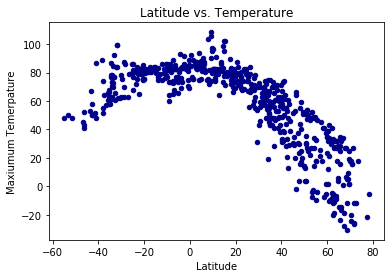

In [6]:
ax1 = df.plot.scatter(x='Lat',
                      y='Max Temp',
                      c='DarkBlue')
label_plot(ax1, 'Latitude vs. Temperature', "Latitude", "Maxiumum Temerpature")
plt.savefig('LatVTemp.png')
plt.show()

#### Latitude vs Temperature: Observation
Temperatures tend to increase closer to the equator (latitude 0) then fall off by distance either to the north or south. 

#### Latitude vs. Humidity Plot

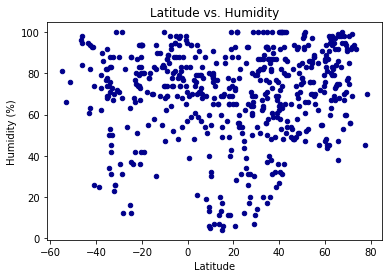

In [7]:
ax1 = df.plot.scatter(x='Lat',
                      y='Humidity',
                      c='DarkBlue')
label_plot(ax1, 'Latitude vs. Humidity', "Latitude", "Humidity (%)")
plt.savefig('LatVHumid.png')
plt.show()

#### Latitude vs Humidity: Observation


#### Latitude vs. Cloudiness Plot

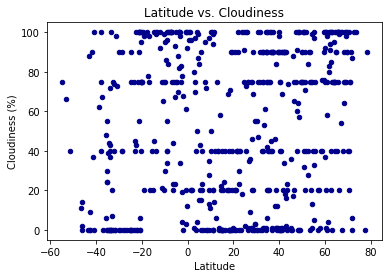

In [8]:
ax1 = df.plot.scatter(x='Lat',
                      y='Cloudiness',
                      c='DarkBlue')
label_plot(ax1, 'Latitude vs. Cloudiness', "Latitude", "Cloudiness (%)")
plt.savefig('LatVCloud.png')
plt.show()

#### Latitude vs Cloudiness: Observation


#### Latitude vs. Wind Speed Plot

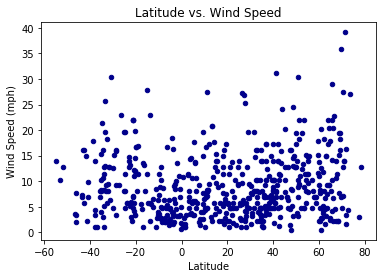

In [9]:
ax1 = df.plot.scatter(x='Lat',
                      y='Wind Speed',
                      c='DarkBlue')
label_plot(ax1, 'Latitude vs. Wind Speed', "Latitude", "Wind Speed (mph)")
plt.savefig('LatVWind.png')
plt.show()

#### Latitude vs Windspeed: Observation


## Linear Regression

In [10]:
# OPTIONAL: Create a function to create Linear Regression plots

# Calculate the correlation coefficient and linear regression 
# model for mouse weight and average tumor volume for the Capomulin regimenn
# Use sci pi to the the pearson r measure of correlation (r value)

def plot_linear_regression(x_values, y_values, x_label, y_label):    
    # Do a line regression on x and y values to calculate values for the line
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    
    # Longer print message - can uncomment if would prefer longer message
#     print('The correlation between ' + x_label + 
#       '\033[1m and \033[0m' +
#       'the ' + y_label +
#       '\033[1m is \033[0m' + 
#        f'\033[36m {rvalue:2.2f} \033[0m')
    
    print('The r-squared' + '\033[1m is \033[0m' + f'\033[36m {rvalue:2.6f} \033[0m')

    # Create a scatter plot of weight versus average tumor volume
    plt.scatter(x_values,y_values)
    
    # Add a red line to indicate the correlation
    plt.plot(x_values,regress_values,"r-")
    
    # Create labels for the axes
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(x_label+" Versus "+ y_label)

    # Show the plot
    plt.show()

In [11]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = df[df['Lat'] >= 0]    #greater than or equal to 0 degrees latitude
southern_df = df[df['Lat'] <  0]   #less than 0 degrees latitude

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is  -0.874948 


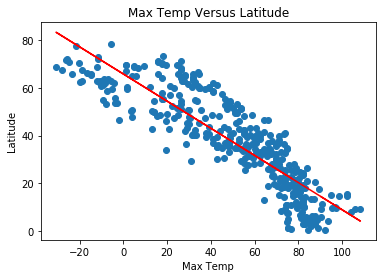

In [12]:
# Call the linear regression functino
plot_linear_regression(northern_df['Max Temp'], northern_df['Lat'], "Max Temp", "Latitude")

##### Northern Hemisphere - Max Temp vs. Latitude Linear Regression: Obervation

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is  0.579829 


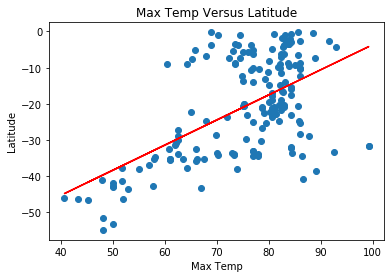

In [13]:
plot_linear_regression(southern_df['Max Temp'], southern_df['Lat'], "Max Temp", "Latitude")

##### Southern Hemisphere - Max Temp vs. Latitude Observation

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is  0.291030 


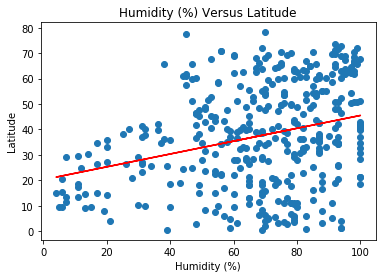

In [14]:
plot_linear_regression(northern_df['Humidity'], northern_df['Lat'], "Humidity (%)", "Latitude")

#####  Northern Hemisphere - Humidity (%) vs. Latitude Observation

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is  0.173380 


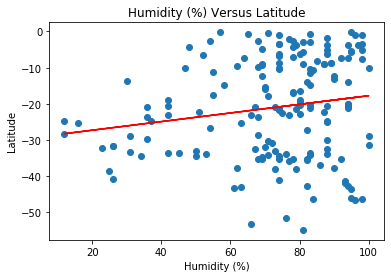

In [15]:
plot_linear_regression(southern_df['Humidity'], southern_df['Lat'], "Humidity (%)", "Latitude")

#####  Southern Hemisphere - Humidity (%) vs. Latitude Observation

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is  0.274449 


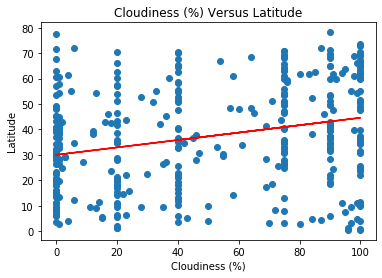

In [16]:
plot_linear_regression(northern_df['Cloudiness'], northern_df['Lat'], "Cloudiness (%)", "Latitude")

#####  Northern Hemisphere - Cloudiness vs. Latitude Observation

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is  0.378702 


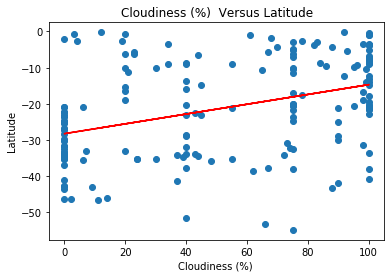

In [17]:
plot_linear_regression(southern_df['Cloudiness'], southern_df['Lat'], "Cloudiness (%) ", "Latitude")

#####  Southern Hemisphere - Cloudiness vs. Latitude Observation

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is  0.219109 


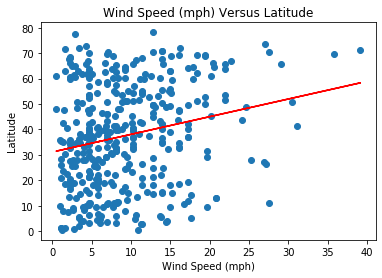

In [18]:
plot_linear_regression(northern_df['Wind Speed'], northern_df['Lat'], "Wind Speed (mph)", "Latitude")

#####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Observation

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is  -0.249721 


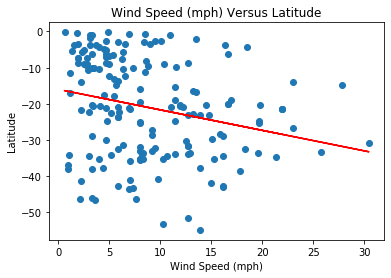

In [19]:
plot_linear_regression(southern_df['Wind Speed'], southern_df['Lat'], "Wind Speed (mph)", "Latitude")

#####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Observation

# End of Notebook 